# 18.06 Problem Set 9

Due Friday, April 15, at 11am.

## Problem 1 (5+5+5+5 points)

Suppose that you have the following Markov matrix, an "absorbing" Markov matrix because once you reach state 5 you "never escape":

In [39]:
M = [ 0.899  0.5  0.1  0.5  0
      0.1    0.3  0.4  0.0  0
      0.0    0.1  0.4  0.0  0
      0.001  0.0  0.1  0.49 0
      0.0    0.1  0.0  0.01 1 ]

5×5 Matrix{Float64}:
 0.899  0.5  0.1  0.5   0.0
 0.1    0.3  0.4  0.0   0.0
 0.0    0.1  0.4  0.0   0.0
 0.001  0.0  0.1  0.49  0.0
 0.0    0.1  0.0  0.01  1.0

**(a)** Check (numerically with Julia) that $M^n x$ will eventually (for $n \to \infty$) reach a steady state for *any* $x$.   What must be true of the eigenvalues of $M$ for this to happen?

In [65]:
using LinearAlgebra
λ, X = eigen(M);

# check something about λ?

**(b)** Suppose that you start with $x = e_1 = [1,0,0,0,0]$ (i.e. in "state 1").  As we saw in class for Chutes & Ladders, the probability $p(n)$ of reaching state $e_5 = [0,0,0,0,1]$ after exactly $n$ steps is

$$
p(n) = e_5^T (M^n - M^{n-1}) e_1
$$

This is plotted below. As you can see, the probability $p(n)$ goes down *very* slowly after an initial rapid rise.  In fact, from the fact that it is almost a straight line on a semilog plot (right), the decay of $p(n)$ is approximately *exponential*:
$$
p(n) \approx (\mbox{some coefficient}) e^{-k n}
$$
for some constant $k$.   **What is $k$**, as determined from the eigenvalues of $M$?

To solve this, imagine expanding $e_1$ in the basis of eigenvectors.  What does $(M^n - M^{n-1}) e_1$ look like in that basis?  What happens when $n$ is large?

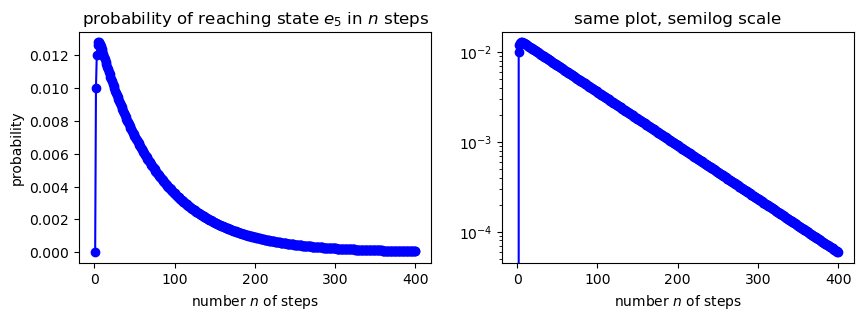

PyObject Text(0.5, 28.0, 'number $n$ of steps')

In [57]:
using PyPlot
e₁ = [1,0,0,0,0]
e₅ = [0,0,0,0,1]
n = 1:400

figure(figsize=(10,3))

subplot(1,2,1)
plot(n, [e₅'*(M^n - M^(n-1))*e₁ for n in n], "bo-")
title(L"probability of reaching state $e_5$ in $n$ steps")
xlabel(L"number $n$ of steps")
ylabel("probability")

subplot(1,2,2)
semilogy(n, [e₅'*(M^n - M^(n-1))*e₁ for n in n], "bo-")
title("same plot, semilog scale")
xlabel(L"number $n$ of steps")

**(c)** As discussed in class, the *average* number of steps to reach state $e_5$ is therefore:
$$
\sum_{n=1}^\infty n e_5^T (M^n - M^{n-1}) e_1 = e_5^T \left[ \sum_{n=1}^\infty  n (M^n - M^{n-1}) \right] e_1 \, .
$$

Suppose you are given the diagonalization
$$
M = X \begin{pmatrix} \lambda_1 & & & & \\ & \lambda_2 & & & \\ & & \lambda_3 & & \\ & & & \lambda_4 & \\ & & & & 1 \end{pmatrix} X^{-1}
$$
of $M$ (noting that one of the eigenvalues must $= 1$).  In terms of $X$ and these $\lambda_k$, give an **exact formula** for the matrix:
$$
\sum_{n=1}^\infty  n (M^n - M^{n-1}) = \; ?
$$
You may use the formulas for an [arithmetico-geometric series](https://en.wikipedia.org/wiki/Arithmetico%E2%80%93geometric_sequence) $\sum_{n=1}^\infty n r^n = r/(1-r)^2$ or for and/or for a geometric series $\sum_{n=0}^\infty r^n = 1/(1-r)$ (note the difference in starting $n$), but you may only apply these formulas to *scalars* (and be careful when $r=1$!).

**(d)** We can compute the average number of steps numerically, to a good approximation, just by summing a lot of terms:

In [70]:
# average number of steps to reach e₅, summed numerically:
sum([n * e₅'*(M^n-M^(n-1))*e₁ for n in 1:10^5])

75.11223892250649

Check that this answer **matches** $e_5^T (\mbox{your part c}) e_1$ using your answer from part (c) and the $X$ and $\lambda$ computed by Julia.

## Problem 2 (5+5+5 points)

In class, we saw that $o = [1,1,\ldots,1,1]$ is an eigenvector of $M^T$ with eigenvalue $\lambda = 1$ for any Markov matrix $M$.

**(a)** If $x_k$ is an eigenvector of $M$ ($M x_k = \lambda_k x_k$) for any *other* eigenvalue $\lambda_k \ne 1$ of $M$, show that we must have $o^T x_k = 0$: it must be *orthogonal* to $o$.  (Hint: use $o^T = o^T M$.)

**(b)** Check your result from (a) numerically for the Markov matrix from problem 1.

**(c)** If we expand an arbitrary $x$ in an eigenvector basis $x = c_1 x_1 + \cdots + c_m x_m$, letting $x_m$ be a steady-state eigenvector ($\lambda_m = 1$) and supposing all of the other eigenvalues are $\ne 1$, show that $o^T x$ gives us a simple formula for $c_m$.  (We derived the same formula in a different way in class.)

## Problem 3 (4+4+4+4+4+4 points)

(Based on Strang, section 6.2, problem 9.)

Suppose we form a sequence of numbers $g_0,g_1,g_2,g_3$ by the rule

$$
g_{k+2} = (1-w) g_{k+1} + w g_k
$$

for some scalar $w$.  If $0 < w < 1$, then $g_{k+2}$ could be thought of as a **weighted average** of the previous two values in the sequence.  For example, for $w = 0.5$ (equal weights) this produces the sequence
$$
g_0,g_1,g_2,g_3,\ldots = 0, 1, \frac{1}{2}, \frac{3}{4}, \frac{5}{8}, \frac{11}{16}, \frac{21}{32}, \frac{43}{64}, \frac{85}{128}, \frac{171}{256}, \frac{341}{512}, \frac{683}{1024}, \frac{1365}{2048}, \frac{2731}{4096}, \frac{5461}{8192}, \frac{10923}{16384}, \frac{21845}{32768}, \ldots
$$

**(a)** If we define $x_k = \begin{pmatrix} g_{k+1} \\ g_k \end{pmatrix}$, then write the rule for the sequence in matrix form: $x_{k+1} = A x_k$.  What is $A$?

**(b)** Find the eigenvalues and eigenvectors of A (your answers should be a function of $w$).  Check your answers with the `λ, X = eig(A)` function in Julia for $w=0.1$.

**(c)** What happens to the eigenvalues and eigenvectors as $w$ gets closer and closer to $-1$?  Is there a still a basis of eigenvectors and a diagonalization of $A$ for $w=-1$?

**(d)** For $0 < w < 1$, the eigenvalues immediately tell which of these three possibilities occurs: the sequence *diverges*, *decays*, or *goes to a nonzero constant* as $n\to\infty$?    Does this behavior depend on the starting vector $x_0$?

**(e)** Find the limit as $n\to\infty$ of $A^n$ (for $0 < w < 1$) from the diagonalization of $A$.  (Your answer should be a function of $w$.  Google the formula for the inverse of a $2\times 2$ matrix if you need it.)

**(f)** For $w=0.5$, if $g_0 = 0$ and $g_1 = 1$, i.e. $x_0 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$, then show that the sequence approaches 2/3.